In [1]:
import pandas as pd
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

In [2]:
df = pd.read_csv('mergeddatasettweets_for_method1.csv')
print("Number of tweets: ",len(df['tweet']))
df.head(5)

Number of tweets:  154117


C:\Users\Karthika Preethi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,id,conversation_id,created_at,date,timezone,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,0,1594481807558430720,1594481807558430720,1.668989e+12,2022-11-21 00:04:21,0,NaN,Data as a new design material: ethical implica...,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1,1592919585577373698,1592919585577373698,1.668617e+12,2022-11-16 16:36:38,0,NaN,"IT graduates, the monies are steeped on your s...",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,2,1592871515858808832,1592871492479782916,1.668605e+12,2022-11-16 13:25:38,0,NaN,"Third, the last principle of generosity experi...",en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,3,1591974859567165440,1591493075565948940,1.668391e+12,2022-11-14 02:02:38,0,NaN,@CubanBTC @Sim_Startup_ @cantrell •Computer vi...,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CubanBTC', 'name': 'CubanHod...",NaN,NaN,NaN,NaN
4,4,4,1591809985071104001,1591809979819773952,1.668352e+12,2022-11-13 15:07:29,0,NaN,Non-tech roles: • Human Resources • Artificia...,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [3]:
df.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
id                   int64
conversation_id      int64
created_at         float64
date                object
timezone             int64
place               object
tweet               object
language            object
hashtags            object
cashtags            object
user_id              int64
user_id_str          int64
username            object
name                object
day                  int64
hour                 int64
link                object
urls                object
photos              object
video                int64
thumbnail           object
retweet               bool
nlikes               int64
nreplies             int64
nretweets            int64
quote_url           object
search              object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
t

In [4]:
df.dropna(axis='columns', inplace=True)
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'conversation_id', 'created_at',
       'date', 'timezone', 'tweet', 'language', 'hashtags', 'cashtags',
       'user_id', 'user_id_str', 'username', 'name', 'day', 'hour', 'link',
       'urls', 'photos', 'video', 'retweet', 'nlikes', 'nreplies', 'nretweets',
       'search', 'reply_to'],
      dtype='object')

In [5]:
df = df[['tweet']]

In [6]:
df.drop_duplicates()
df.shape

(154117, 1)

In [7]:
import re
import gensim
from nltk.stem import WordNetLemmatizer
punctuation = '!”$%&\’()*+,-./:;<=>?[\\]^_`{|}~•@'

In [8]:
#Removing Links
def remove_links(tweet):
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet


In [9]:
#Removing retweet and @user information
def remove_users(tweet):
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

In [10]:
#Removing Hashtags
def remove_hashtags(tweet):
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet

In [11]:
#Removing Audio/Video tags or labels
def remove_av(tweet):
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

In [12]:
#Tokenization
def tokenize(tweet):
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS \
                and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

In [13]:
#Lemmatization
def lemmatize(token):
    return WordNetLemmatizer().lemmatize(token, pos='v')

In [14]:
#Main function to clean tweets
def preprocess_tweet(tweet):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    return tweet

In [15]:
#Another Main function to clean tweets without tokenization or removal of stopwords
def basic_clean(tweet):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub('📝 …', '', tweet)
    return tweet

In [23]:
def tokenize_tweets(df):
    df['tokens'] = df.tweet.apply(preprocess_tweet)
    num_tweets = len(df)
    print('Complete. Number of Tweets that have been cleaned and tokenized : {}'.format(num_tweets))
    return df

In [24]:
import preprocessor
#from preprocessor import tokenizetweets
df = tokenize_tweets(df)
df.head(5)

Complete. Number of Tweets that have been cleaned and tokenized : 154117


,tweet,tokens
0,Data as a new design material: ethical implica...,data new design material ethical implications ...
1,"IT graduates, the monies are steeped on your s...",graduate monies steep global demand skills art...
2,"Third, the last principle of generosity experi...",principle generosity experience design tech ac...
3,@CubanBTC @Sim_Startup_ @cantrell •Computer vi...,vision engineer data engineer algorithm engine...
4,Non-tech roles: • Human Resources • Artificia...,non tech roles human resources artificial inte...


In [25]:
df1 = df[['tweet','tokens']]
df1

,tweet,tokens
0,Data as a new design material: ethical implica...,data new design material ethical implications ...
1,"IT graduates, the monies are steeped on your s...",graduate monies steep global demand skills art...
2,"Third, the last principle of generosity experi...",principle generosity experience design tech ac...
3,@CubanBTC @Sim_Startup_ @cantrell •Computer vi...,vision engineer data engineer algorithm engine...
4,Non-tech roles: • Human Resources • Artificia...,non tech roles human resources artificial inte...
...,...,...
154112,Humanizing User Experience through AI - Whethe...,humanize user experience ready
154113,Machine Learning is all set to disrupt the mob...,machine learn set disrupt mobile app store val...
154114,Thought For Today : Artificial Intelligence (A...,think today artificial intelligence deep learn...
154115,Business Intelligence and Machine Learning: Da...,business intelligence machine learn data matte...


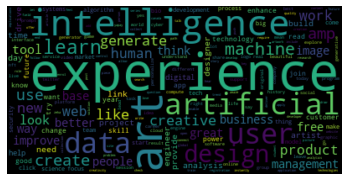

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#from nltk.corpus import stopwords
#stopwords.update(['amp','work','learn','know']) #adding our own stopwords
#customStopwords = set(STOPWORDS)
#customStopwords=list('stopwords')+ ['amp','learn','know', 'new','better','help']
customStopwords=list('stopwords')
#Creating the text variable
text = " ".join(tokens for tokens in df.tokens)
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, stopwords = customStopwords, background_color = 'black').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()